# Assignment 3
- Parsa Torabian
- 20554368
- p2torabi

Populating the interactive namespace from numpy and matplotlib


Text(0.5,0,'$x$')

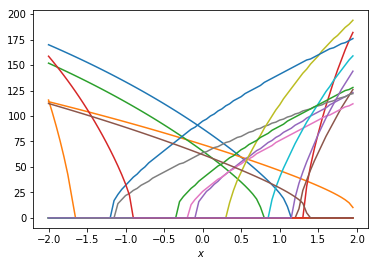

In [1]:
%pylab inline
from Utilities import *
# from Nengo_Utils import *
from Collection import *
import numpy as np
from LIF import LIF
from BaseNeuron import BaseNeuron

#num neurons
N = 16
radius=2
dx = 0.05
es = np.random.choice([-1, 1], size=N) #Array of encoders

collection = Collection(N=N, es=es, max_rates=[100, 200], radius=radius, dx=dx)

A = collection._A
x = collection._x
pyplot.plot(x, A)
xlabel('$x$')

RMSE is:  0.122045264499


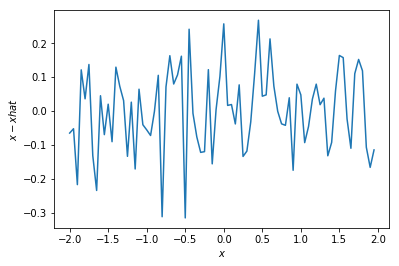

In [2]:
#Question 1b
sigma = 0.1
An = A + np.random.normal(scale=sigma*200, size=shape(A))
D = BaseNeuron.decode(An, x, sigma)

xhat = np.dot(An, D)

error = x - xhat
pyplot.plot(x, error)
xlabel('$x$')
ylabel('$x - xhat$')

print ("RMSE is: ", np.sqrt(np.average(error**2)))

RMSE:  0.470647276209


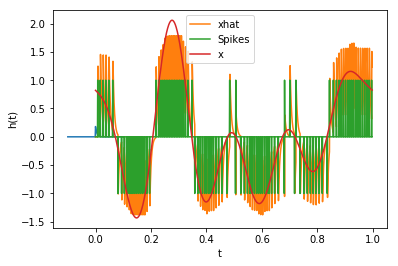

In [3]:
#Question 2
def _filter(n, tau):
    t_h = (np.arange(200)*dt)-0.1
    h = np.power(t_h, n)*np.exp(-t_h/tau)
    h[np.where(t_h<0)]=0
    h = h/norm(h,1)
    return (t_h, h)

selectNeuron = collection._selected
dt = 0.001
t_h, h = _filter(n=0, tau=0.005)
plot(t_h, h)
xlabel('t')
ylabel('h(t)')

timeSignal, freqSignal = generate_signal(T=1, limit=5, rms=1, dt=dt)
x, xt = timeSignal
gain = selectNeuron._gain
bias = selectNeuron._bias

neuron1 = LIF(gain, bias, 1)
neuron2 = LIF(gain, bias, -1)

spikes1, voltages1 = neuron1.voltageBuildup(xt.real, dt)
spikes2, voltages2 = neuron2.voltageBuildup(xt.real, dt)

r = spikes1-spikes2

fspikes1 = np.convolve(spikes1, h, mode='same')
fspikes2 = np.convolve(spikes2, h, mode='same')
A = np.array([fspikes1, fspikes2]).transpose()

d = BaseNeuron.decode(A, xt)
xhat = np.dot(A, d)
plot(x, xhat.real, label="xhat")
plot(x, r, label="Spikes")
plot(x, xt.real, label="x")
legend()

rmse = np.sqrt(np.mean(np.power(xt-xhat, 2)))
print("RMSE: ", rmse.real)


/Users/Parsa/courses/SYDE 556/custom library/BaseNeuron.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x, float)


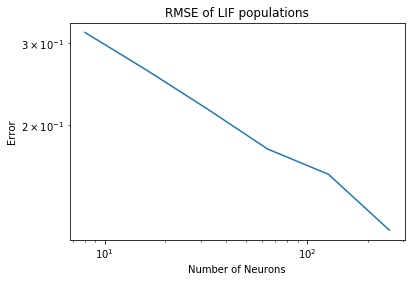

In [4]:
#Question 3
def neuronGroups(N):
    timeSignal, freqSignal = generate_signal(T=1, limit=5, rms=1, dt=dt)
    x, xt = timeSignal

    es = np.random.choice([-1, 1], size=N) #Array of encoders
    collection = Collection(N=N, es=es, max_rates=[100, 200], radius=radius, dx=dx)
    
    spikes, A = collection.spikingBehaviour(xt, dt, h)
    
    r = np.sum(spikes, axis=1)

    d = BaseNeuron.decodeIdeal(A, xt)
    xhat = np.dot(A, d)
    
#     figure()
#     plot(x, r, label="Spikes")
#     plot(x, xhat.real, label="xhat")
#     plot(x, xt.real, label="Signal")
#     title("Signal approximated with " + str(N) + " neurons")
#     legend()

    rmse = np.sqrt(np.mean(np.power(xt-xhat, 2)))
#     print("RMSE: ", rmse.real)
    return rmse.real

testValues = [8, 16, 32, 64, 128, 256]
errors = np.zeros(np.size(testValues))
for i in range(0, 5):
    errors = [sum(x) for x in zip(errors, [neuronGroups(j) for j in testValues])]

errors = [err / 5 for err in errors]

figure()
plot(testValues, errors)
xlabel("Number of Neurons")
ylabel("Error")
title("RMSE of LIF populations")
yscale('log')
xscale('log')

Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          


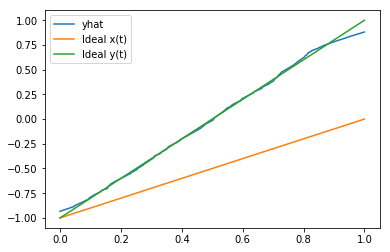

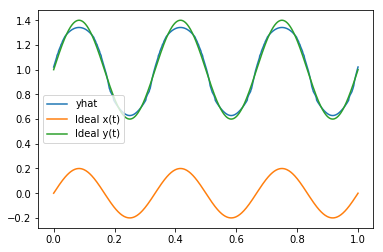

In [5]:
dt = 0.001
def question4(x, xt, dt):
    N = 50
    
    A1, D_x = compute_decoders(N=N, max_rates=[100,200], x=xt, function=lambda t: 2*t+1)
    xhat = np.dot(A1, D_x)
    
    A2, D_y = compute_decoders(N=N, max_rates=[100,200], x=xhat, function=lambda t: t)
    yhat = np.dot(A2, D_y)
    
    figure()
    plot(x, yhat, label="yhat")
    plot(x, xt, label="Ideal x(t)")
    plot(x, 2*xt+1, label="Ideal y(t)")
    legend()

x = np.arange(0, 1+dt, dt)
xt = x - 1
question4(x, xt, dt)

xt = 0.2*np.sin(6*np.pi*x)
question4(x, xt, dt)


Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          


/Users/Parsa/anaconda3/lib/python3.6/site-packages/nengo/neurons.py:46: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x, dtype=float, copy=False, ndmin=1)
/Users/Parsa/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


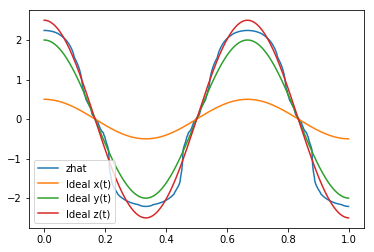

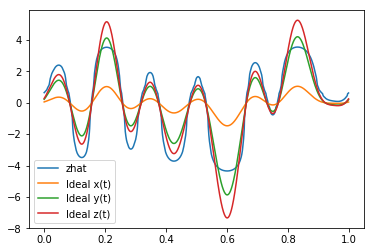

In [6]:
#Question 5
def question5(x, xt, yt):
    A1, D_x = compute_decoders(N=N, max_rates=[100,200], x=xt, function=lambda t: 0.5*t)
    xhat = np.dot(A1, D_x)
    
    A2, D_y = compute_decoders(N=N, max_rates=[100,200], x=xt, function=lambda t: 2*t)
    yhat = np.dot(A2, D_y)
        
    zin = np.add(xhat, yhat)
    A3, D_z = compute_decoders(N=N, max_rates=[100,200], x=zin, function=lambda t: t)
    zhat = np.dot(A3, D_z)
        
    figure()
    plot(x, zhat, label="zhat")
    plot(x, 0.5*xt, label="Ideal x(t)")
    plot(x, 2*xt, label="Ideal y(t)")
    plot(x, (0.5*xt+2*xt), label="Ideal z(t)")
    legend()
    
dt=0.001
x = np.arange(0, 1-dt, dt)
xt = np.cos(3*np.pi*x)
yt = 0.5*np.sin(2*np.pi*x)
question5(x, xt, yt)

timeSignal, freqSignal = generate_signal(T=1, limit=8, rms=1, dt=dt)
gib, xt = timeSignal
timeSignal, freqSignal = generate_signal(T=1, limit=5, rms=0.5, dt=dt)
gib, yt = timeSignal
question5(x, xt, yt)

Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.                                                                                          
Building finished in 0:00:01.           

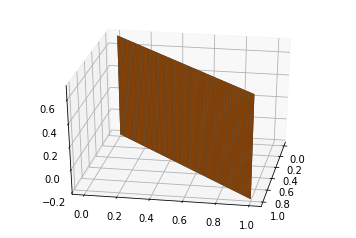

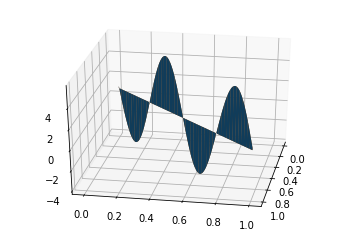

In [17]:
def question6(x, xt, yt, zt, qt):
    N = 50
    A1, D_x = compute_decoders(N=N, max_rates=[100,200], x=xt, function=lambda t: t, dimensions=2)
    xhat = np.dot(A1, D_x)
    
    A2, D_y = compute_decoders(N=N, max_rates=[100,200], x=yt, function=lambda t: -3*t, dimensions=2)
    yhat = np.dot(A2, D_y)
    
    A3, D_z = compute_decoders(N=N, max_rates=[100,200], x=zt, function=lambda t: 2*t, dimensions=2)
    zhat = np.dot(A3, D_z)
    
    A4, D_q = compute_decoders(N=N, max_rates=[100,200], x=qt, function=lambda t: -2*t, dimensions=2)
    qhat = np.dot(A4, D_q)
    
    win = xhat + yhat + zhat + qhat
    A5, D_w = compute_decoders(N=N, max_rates=[100,200], x=win, function=lambda t: t, dimensions=2)
    what = np.dot(A5, D_w)
        
    
    
    w_ideal = np.add(xt, np.multiply(-3, yt))
    w_ideal = np.add(w_ideal, np.multiply(2, zt))
    w_ideal = np.add(w_ideal, np.multiply(-2, qt))
        
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection = '3d')
#     ax.plot_surface(x[0], x[1], yhat, label='what')
#     ax.plot_surface(x[0], x[1], yt, label='what')
#     ax.view_init(10, 10)
#     plt.draw()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot_surface(x[0], x[1], w_ideal, label='what')
    ax.plot_surface(x[0], x[1], what, label='what')
    ax.view_init(30, 10)
    plt.draw()
    
dt = 0.001
ns = int(1/dt)
x_range = np.linspace(0, 1, ns)
x = [x_range, x_range]
xt = [np.ones(ns)*0.5, np.ones(ns)]
yt = [np.ones(ns)*0.1, np.ones(ns)*0.3]
zt = [np.ones(ns)*0.2, np.ones(ns)*0.1]
qt = [np.ones(ns)*0.4, np.ones(ns)*(-0.2)]
question6(x, xt, yt, zt, qt)

dt = 0.001
ns = int(1/dt)
x = [x_range, x_range]
xt = [np.ones(ns)*0.5, np.ones(ns)]
yt = [np.sin(4*np.pi*x_range), np.ones(ns)*0.3]
zt = [np.ones(ns)*0.2, np.ones(ns)*0.1]
qt = [np.sin(4*np.pi*x_range), np.ones(ns)*(-0.2)]
question6(x, xt, yt, zt, qt)
    

The results do not stray much from what we expect them to in this case. However, if they were too, it might have been due to oscillations of the attractor points when modeling a function of many dimensions